# Case Study

In this project there is a csv file of startup_funding given and I have to help my friend in several ways given in the below 5 
questions. I have to use the data given and find the best suggestions which I can given to my friend.

1)Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect 
location where getting the investment has a high chance. But due to its financial restriction, he can choose only between 
three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include
Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where
startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city
name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore",
"bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign.
Consider the startup if any one of the city lies in given locations.

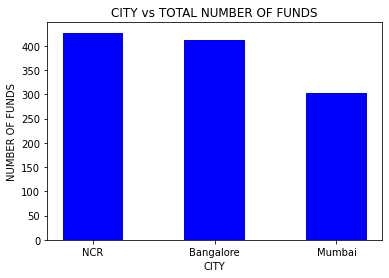

NCR 427
Bangalore 412
Mumbai 303


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv')
df.dropna(subset=["CityLocation"],inplace=True)
df.dropna(subset=["AmountInUSD"],inplace=True)
def separateCity(city):
    return city.split('/')[0].strip()
df['CityLocation'] = df['CityLocation'].apply(separateCity)
df['CityLocation'].replace("Delhi","NCR",inplace = True)
df['CityLocation'].replace("Gurgaon","NCR",inplace = True)
df['CityLocation'].replace("New Delhi","NCR",inplace = True)
df['CityLocation'].replace("Noida","NCR",inplace = True)
df['CityLocation'].replace("bangalore","Bangalore",inplace = True)

df=df[(df.CityLocation=='Bangalore') | (df.CityLocation=='Mumbai') | (df.CityLocation=='NCR')]
c = df['CityLocation'].value_counts()
city = c.index
Number_of_fundings = c.values
plt.bar(city , Number_of_fundings,  width =0.5,color ='b')
plt.xlabel('CITY')
plt.ylabel('NUMBER OF FUNDS')
plt.title('CITY vs TOTAL NUMBER OF FUNDS')
plt.show()

for i in range(len(city)):
    print(city[i],Number_of_fundings[i])

As NCR (Including Gurgaon, Noida and New Delhi) has highest number of funding among Bangalore, Mumbai and NCR and my friend can only establish the startup  in above areas so he can start his start up in NCR. As there is not much difference between total number of funds in NCR and Bangalore he can choose between the two depending upon the favourable conditions.

2)Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


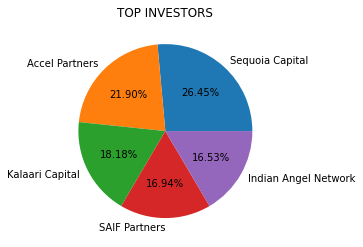

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('startup_funding.csv')
df.dropna(subset = ['InvestorsName'],inplace = True)
Investors = []
li = df['InvestorsName']
for i in li:
    a = i.split(',')
    for j in a:
        Investors.append(j.strip())
dic = {}
for i in Investors:
    dic[i] = dic.get(i,0) + 1
dic1 = {k: v for k, v in sorted(dic.items(), key = lambda x: x[1],reverse = True)}
k = 0
Investor = []
No_of_investment = []
for i in dic1 :
    k += 1
    if(k <=5):
        print(i,dic1[i])
        Investor.append(i)
        No_of_investment.append(dic1[i])
        
    else:
        break
plt.pie(No_of_investment,labels=Investor,autopct='%0.2f%%')
plt.title('TOP INVESTORS')
plt.show()

As from the data the above investors are among the top 5 investor so, I would recommend my friend to first contact them for funds as there will be a high chances of getting funds from them as compared to that of any other investor.

3)After re-analysing the dataset you found out that some investors have invested in the same startup at different number of
funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have 
invested in different number of startups. This list will be more helpful than your previous list in finding the investment
for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That 
means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in 
startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


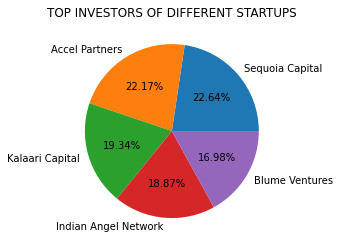

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName', 'StartupName'])

df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)


investor_name = []
startup_name = []
for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

df1 = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
df1 = df1.groupby('InvestorsName')['StartupName'].nunique()
df1 = df1.sort_values(ascending = False)[0:5]
Investor = []
Investment_in_diff_startup = []
for i in range(5):
    print(df1.index[i],df1.values[i])
    Investor.append(df1.index[i])
    Investment_in_diff_startup.append(df1.values[i])
    

plt.pie(Investment_in_diff_startup,labels=Investor,autopct='%0.2f%%')
plt.title('TOP INVESTORS OF DIFFERENT STARTUPS')
plt.show()


As my previous list (in q-2)  contain top 5 investors but that doesn’t gives us clear picture because that list also contain investors who have invested multiple times to the same startup so my new list as shown above are list of top 5 investors who have invested in different startups so I would recommend my friend to first contact them for funds.

4)Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So 
you went to your investor friend to understand the situation better and your investor friend explained to you about the 
different Investment Types and their features. This new information will be helpful in finding the right investor. Since your
friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find 
the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed 
Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding".
Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors 
in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Indian Angel Network 33
Rajan Anandan 23
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 14


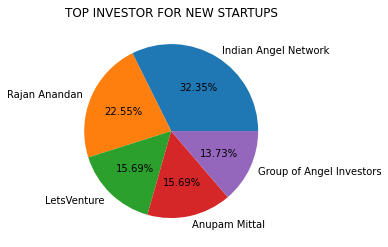

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName', 'StartupName'])

df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df = df[(df.InvestmentType == 'Crowd Funding') | (df.InvestmentType == 'Seed Funding')]


investor_name = []
startup_name = []
for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

df1 = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
df1 = df1[df1.InvestorsName != 'Undisclosed Investors']
df1 = df1[df1.InvestorsName != 'Undisclosed investors']
df1 = df1[df1.InvestorsName != 'undisclosed investors']
df1 = df1[df1.InvestorsName != 'undisclosed investor']
df1 = df1.groupby('InvestorsName')['StartupName'].nunique()
df1 = df1.sort_values(ascending = False)[0:5]

Investor = []
Investment_in_diff_startup = []
for i in range(5):
    print(df1.index[i],df1.values[i])
    Investor.append(df1.index[i])
    Investment_in_diff_startup.append(df1.values[i])
    

plt.pie(Investment_in_diff_startup,labels=Investor,autopct='%0.2f%%')
plt.title('TOP INVESTOR FOR NEW STARTUPS')
plt.show()


After talking with my investor friend I make a new list of top 5 investors (among Seed Funding and Crowdfunding investment type). Talking with above investors would probably help my friend to get funds.

5)Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


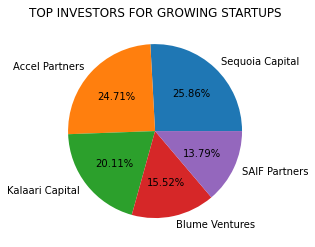

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('startup_funding.csv',encoding = 'utf-8')
df=df.dropna(subset=['InvestorsName', 'StartupName'])

df['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Ola Cabs','Ola',inplace = True)
df['StartupName'].replace('Olacabs','Ola',inplace = True)
df['StartupName'].replace('Flipkart.com','Flipkart',inplace = True)
df['StartupName'].replace('Paytm Marketplace','Paytm',inplace = True)

df['InvestmentType'].replace('SeedFunding','Seed Funding',inplace=True)
df['InvestmentType'].replace('PrivateEquity','Private Equity',inplace=True)
df['InvestmentType'].replace('Crowd funding','Crowd Funding',inplace=True)
df = df[(df.InvestmentType == 'Private Equity')]


investor_name = []
startup_name = []
for index,row in df.iterrows():
    s = row['InvestorsName']
    v = row['StartupName']
    
    i = str(s)
    l = i.split(',')
    
    for j in l:
        if j != '':
            j = j.strip()
            investor_name.append(j)
            startup_name.append(v)

df1 = pd.DataFrame({'InvestorsName' : investor_name,'StartupName' : startup_name})
df1 = df1[df1.InvestorsName != 'Undisclosed Investors']
df1 = df1[df1.InvestorsName != 'Undisclosed investors']
df1 = df1[df1.InvestorsName != 'undisclosed investors']
df1 = df1[df1.InvestorsName != 'undisclosed investor']
df1 = df1.groupby('InvestorsName')['StartupName'].nunique()
df1 = df1.sort_values(ascending = False)[0:5]

Investor = []
Investment_in_diff_startup = []
for i in range(5):
    print(df1.index[i],df1.values[i])
    Investor.append(df1.index[i])
    Investment_in_diff_startup.append(df1.values[i])
    

plt.pie(Investment_in_diff_startup,labels=Investor,autopct='%0.2f%%')
plt.title('TOP INVESTORS FOR GROWING STARTUPS')
plt.show()


The above mentioned list is of top 5 investors among Private Equity as there are more chances to get funds for my friend startup which is in it’s growth stage. So, I would recommend my friend to first contact them for funds as there will be a high chances of getting funds from them.